# Symbolic Computing

Symbolic computing allows you to use a computer to do all the algebra you might otherwise do by hand.

[SymPy](https://www.sympy.org/en/index.html) is a popular package for symbolic computing.

```bash
conda install sympy
```

In [1]:
import sympy as sym
import math
import numpy as np

A good place to start is the [SymPy tutorial](https://docs.sympy.org/latest/tutorial/index.html)

Let's compare how `sympy` evaluates `sqrt` vs. `math`

In [2]:
print(math.sqrt(8))
print(np.sqrt(8))

2.8284271247461903
2.8284271247461903


In [3]:
sym.sqrt(8)

2*sqrt(2)

Note that jupyter notebooks render the output nicely.

the `math` package gives a floating point approximation to $\sqrt{8}$, whereas `sympy` simplifies the expression by removing any divisors that are perfect squares.

In [4]:
a = sym.sqrt(8)
print(a)
type(a)

2*sqrt(2)


sympy.core.mul.Mul

## Algebraic Expressions

Symbolic computing is particularly useful for manipulating algebraic expressions.

In [5]:
from sympy import symbols, expand, factor

You can build expressions using symbols:

In [6]:
x, y = symbols('x y')
expr = 2*x + y
expr

2*x + y

Let's say we forgot how to mulitply monomials

In [7]:
a, b, c, d = symbols('a b c d')
x, y = symbols('x, y')
ex1 = a*x + b
ex2 = c*x + d
ex1 * ex2

(a*x + b)*(c*x + d)

we can expand an expression by multiplying everything out and combining like terms:

In [8]:
ex = expand(ex1 * ex2)
ex

a*c*x**2 + a*d*x + b*c*x + b*d

We can calso factor an expression that has been expanded:

In [9]:
factor(ex)

(a*x + b)*(c*x + d)

You can substitute values (or other symbols) for symbols:

In [10]:
ex.subs([(a, 1), (b, 2), (c, 3), (d, y)])

3*x**2 + x*y + 6*x + 2*y

In [11]:
ex_sub = ex.subs([(a, 1), (b, 2), (c, 2), (d, 3)])
ex_sub

2*x**2 + 7*x + 6

You can evaluate expressions numerically:

In [12]:
ex_sub.evalf(subs={x: 0.1})

6.72000000000000

SymPy uses arbitrary precision arithmetic.  The default precition is 10 decimal digits (between single and double precision), but you can increase the precision in `evalf`

In [13]:
sym.pi.evalf()

3.14159265358979

In [14]:
sym.pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

## Symbolic Mathematics

Sympy supports just about everything you might have learned in courses on algebra and calculus (and more)

In [15]:
import sympy as sym

### Differentiation

In [16]:
expr = sym.sin(x)
print(expr)
print(sym.diff(expr)) # symbolic differentiation w.r.t x

sin(x)
cos(x)


In [17]:
expr = x * y
sym.diff(expr, x) # differentiate w.r.t. x

y

### Integration

In [18]:
expr = sym.sin(x)
print(expr)
print(sym.integrate(expr, x)) # indefinite integral w.r.t x

sin(x)
-cos(x)


the sympy variable `oo` (two `o` symbols) is used to represent $\infty$

In [19]:
from sympy import oo
expr = sym.exp(-(x**2))
sym.integrate(expr, (x, -oo, oo)) # integration with limits

sqrt(pi)

In [20]:
sym.integrate(expr, (x, -1, 1))

sqrt(pi)*erf(1)

### Limits

You can compute limits.  For example:
\begin{equation}
\lim_{x\to 0} \frac{\sin(x)}{x}
\end{equation}

In [21]:
sym.limit(sym.sin(x)/x, x, 0) # limit as x \to 0

1

### Roots

You can compute roots of functions using `solve` (i.e. we solve the system `f(x) = 0` for `x`)

In [22]:
sym.solve(x**2 - 3, x)

[-sqrt(3), sqrt(3)]

## Symbolic to Numerical Functions

You can turn sympy functions into lambda functions that are compatible with numpy using `lambdify`:

In [23]:
f = sym.sin(x)
g = sym.lambdify(x, f, 'numpy')
g(np.array(np.linspace(0,1,10)))

array([0.        , 0.11088263, 0.22039774, 0.3271947 , 0.42995636,
       0.52741539, 0.6183698 , 0.70169788, 0.77637192, 0.84147098])

## Plotting Functions

You can plot a symbolic function using the sympy `plot` function

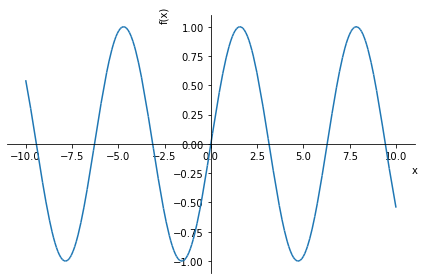

In [25]:
f = sym.sin(x)
sym.plot(f)

you can change the domain using a tuple with the variable and lower and upper bounds

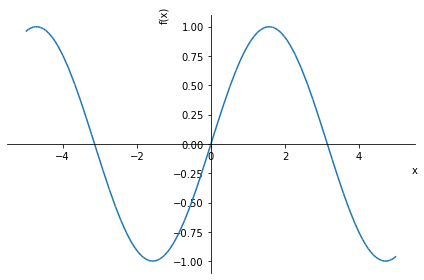

In [26]:
sym.plot(f, (x, -5,5))

There are a variety of keyword arguments you can use for formatting as well. See `help(sym.plot)` for more information.

## Exercises

Use sympy to compute solutions to answer the following questions

1. What is $\int_{1}^{\infty} x^{-2}\, dx$?
2. Find a value of `x` where `sin(x) = cos(x)`